In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

train_data = pd.read_csv("./data/train.csv")
test_data = pd.read_csv("./data/test.csv")
id_period_mapping = pd.read_csv("./data/id_period_mapping.csv")
test_data["period"] = id_period_mapping["period"]
sample_submission = pd.read_csv("./data/sample_submit.csv", header=None)

test_data.index = test_data["data_id"]

mask = (train_data["period"] == "train9") | (train_data["period"] == "train6") | (train_data["period"] == "train4") | (train_data["period"] == "train7") | \
(train_data["period"] == "train5") | (train_data["period"] == "train3") | (train_data["period"] == "train1") | (train_data["period"] == "train14") | \
(train_data["period"] == "train13") | (train_data["period"] == "train11") | (train_data["period"] == "train10") | (train_data["period"] == "train2") | \
(train_data["period"] == "train12") | (train_data["period"] == "train10") | (train_data["period"] == "train14")
train_data = train_data[mask] 


train_y = train_data.iloc[:, -1]

l = [1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14]
dfx = pd.DataFrame()
#for i in range(1, 15):
for i in l:
    dfi = train_data[train_data.period == "train{}".format(i)].iloc[:, 2:90]
    dfx = dfx.append((dfi - dfi.mean()) / dfi.std())
train_X = dfx

dfx = pd.DataFrame()
for i in range(1, 11):
    dfi = test_data[test_data.period == "test{}".format(i)].iloc[:, 1:-1]
    dfx = dfx.append((dfi - dfi.mean()) / dfi.std())
test_X = dfx
test_X = test_X.loc[test_data.index]


feature_select = ["c12", "c80", "c48", "c81"] #  0.69230
train_X_select = train_X[feature_select]
train_X_select["bias"] = 1
test_X_select = test_X[feature_select]
test_X_select["bias"] = 1

w = np.linalg.inv(train_X_select.T.dot(train_X_select)).dot(train_X_select.T).dot(train_y)



# 線形回帰
sample_submission[1] = w.dot(test_X_select.T)
sample_submission.to_csv("result.csv", index=0)

In [11]:
sample_submission[1].min()

0.32882895424872782

In [12]:
sample_submission[1].max()

0.66647767447132844

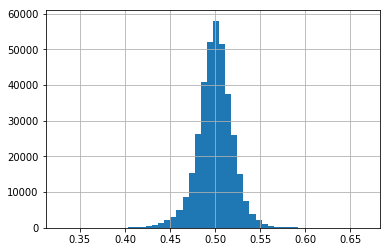

In [13]:
sample_submission[1].hist(bins=50)